In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/home/prasun/GitDemo/Time_Trekking/Dataset/book_sales.csv",
                 index_col="Date", parse_dates=["Date"]).drop(["Paperback"],axis="columns")
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [3]:
# time-step feature (time-dependence)
df["Time"] = np.arange(len(df.index))

In [4]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

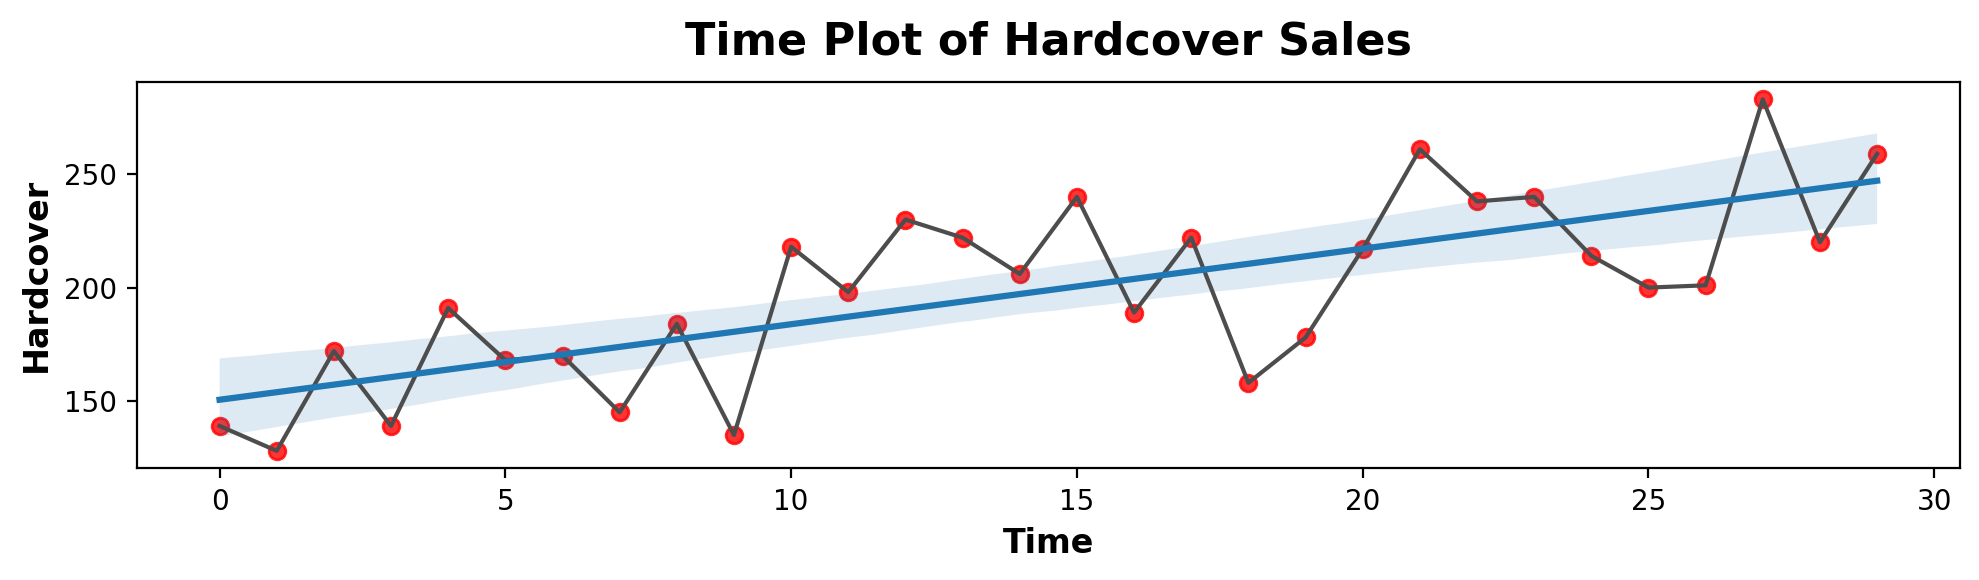

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc(
    "figure",
    autolayout=True,
    figsize=(10, 3),
    titlesize=8,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.3')
ax = sns.regplot(x='Time', y='Hardcover', data=df, scatter_kws=dict(color='red'))
ax.set_title('Time Plot of Hardcover Sales')

In [8]:
#Lag-Feature (Shift as if they occurred later in time)
df["lag_1"] = df["Hardcover"].shift(1)
df= df.reindex(columns=["Hardcover","lag_1"])
df.head()

,Hardcover,lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

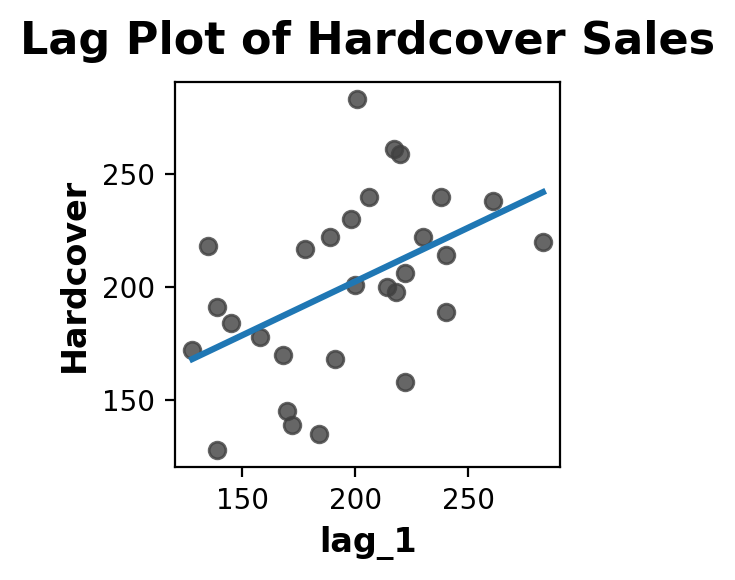

In [10]:
#Lag_Plot (Plotting observation along with their corresponding lag_feature)
fig, ax = plt.subplots()
ax = sns.regplot(x='lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

- Clearly depicts sequential dependence
- Hence lag-feature is useful in this case